# Correct the metadata on Cell Painting Gallery

__Author: Runxi Shen__

__Date: 2025-03-03__

This notebook aims to correct the incorrect metadata (mismatched gene allele information and well position on the 384-well plate due to robotic technical errors) for VarChAMP 1% project's Batch 7-8 on Cell Painting Gallery.

In [21]:
import pandas as pd
import os
# import numpy as np
# import logging
# import polars as pl

# # Configure logging to display messages in the notebook
# logging.basicConfig(
#     level=logging.INFO,  # Set the logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
#     format='%(asctime)s - %(levelname)s - %(message)s',  # Define message format
#     datefmt='%Y-%m-%d %H:%M:%S'  # Define date format
# )
# # Create a logger
# logger = logging.getLogger(__name__)

# For pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Maximum width of columns

# For polars
# pl.Config.set_tbl_rows(100)      # Number of rows to display
# pl.Config.set_tbl_cols(100)      # Number of columns to display
# pl.Config.set_fmt_str_lengths(100) # Maximum width of string columns

## split the raw metadata into two parts: mut info and cell/well info
ALLELE_INFO_COLS = [
    'control_type', 'symbol','gene_allele', 'source_plate', 'source_well', 'source_numb',
    'dest_plate', 'dest_well', 'dest_numb', 'node_type', 'orf_id_wt',
    'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
    'clone_ID', 'hgmd_ID', 'clinvar_allele_ID', 'clinvar_clinical_significance'
]
WELL_INFO_COLS = [
    'plate_map_name', 'well_position', 'imaging_well',
    'imaging_plate_R1', 'imaging_plate_R2', 'imaging_plate', 'batch1', 'batch2',
    'vector', 'notes', 'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'
]

## Loading necessary files

### The corrected metadata

__HANDMADE correction__: 

```CTH_Thr67IIe``` to ```CTH_Thr67Ile``` in the meta data

A typo for Ile AA in line ```CSNK1D,CSNK1D_His46Arg,H11,B7A1R1_P1,B8A1R2_P1,CTH,CTH_Thr67Ile```

```SMAD3_Ile87Thr``` to ```SMAD3``` in the final symbol

A mismatch for SMAD3 final_symbol in line ```MSRB3,MSRB3,I13,B7A2R1_P1,B8A2R2_P1,SMAD3,SMAD3_Ile87Thr```


In [41]:
# Define the directory path
data_dir = "../../input/meta_correct_batch78/"
correct_meta_file = "onepercent_metadata_update_20250305.csv"

## import the corrected metadata
meta_corrected_df = pd.read_csv(os.path.join(data_dir, correct_meta_file))
print("Corrected metadata for batch 7 + 8 imported with shape:", meta_corrected_df.shape)
# display(meta_corrected_df)

### The below functions have been properly performed and changed the file
### ========================================================================
## replace the naming of imaging plate R1 and R2 with the correct ones
# print("Incorrect naming of imaging plate R1: ", meta_corrected_df["imaging_plate_R1"].unique())
# print("Incorrect naming of imaging plate R2: ", meta_corrected_df["imaging_plate_R2"].unique())
# meta_corrected_df = meta_corrected_df.replace({
#     "imaging_plate_R1": {"B7A1R1_P0": "B7A1R1_P4"},
#     "imaging_plate_R2": {"B8A1R2_P0": "B8A1R2_P4"}}
# )
# print("Corrected naming of imaging plate R1: ", meta_corrected_df["imaging_plate_R1"].unique())
# print("Corrected naming of imaging plate R2: ", meta_corrected_df["imaging_plate_R2"].unique())

## for checking name matching only, still need to KEEP ALL WELLS no matter if they have final_gene_allele or not
# meta_corrected_df_no_nan = meta_corrected_df[meta_corrected_df["final_gene_allele"].notna()].copy()
# meta_corrected_df_no_nan["final_gene"] = meta_corrected_df_no_nan["final_gene_allele"].apply(lambda x: x.split("_")[0])
# print("Final Symbol and Final Gene are the same: ", all(meta_corrected_df_no_nan["final_gene"] == meta_corrected_df_no_nan["final_symbol"]))
# print("Mismatch between Final Symbol and Final Gene: ")
# display(meta_corrected_df_no_nan[meta_corrected_df_no_nan["final_gene"] != meta_corrected_df_no_nan["final_symbol"]])

# print("Cleaning up gene symbols and check if they are formatted correctly:")
# meta_corrected_df_no_nan = meta_corrected_df[meta_corrected_df["final_gene_allele"].notna()].copy()
# meta_corrected_df_no_nan["final_gene"] = meta_corrected_df_no_nan["final_gene_allele"].apply(lambda x : x.split('_')[0] if not pd.isnull(x) else x)
# print("Final Symbol and Final Gene are the same: ", all(meta_corrected_df_no_nan["final_gene"] == meta_corrected_df_no_nan["final_symbol"]))
# meta_corrected_df[meta_corrected_df["final_gene_allele"].isna()]

# print("Final Symbol and Final Gene Mismatch:")
# display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])].head())

# display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])&(meta_corrected_df["final_gene"].notna())].head())

# print("Reformatting the gene symbol and correct gene vs symbol mismatch:")
# meta_corrected_df["final_symbol"] = meta_corrected_df["final_gene"]
# display(meta_corrected_df[meta_corrected_df["final_gene_allele"]=="SMAD3_Ile87Thr"].head())
# display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])&(meta_corrected_df["final_gene"].notna())].head())

meta_corrected_df["plate_well_id_b7"] = meta_corrected_df["imaging_plate_R1"] + "-" + meta_corrected_df["imaging_well"]
meta_corrected_df["plate_well_id_b8"] = meta_corrected_df["imaging_plate_R2"] + "-" + meta_corrected_df["imaging_well"]
### ========================================================================

meta_corrected_df.rename(columns={
    "imaging_well": "imaging_well_",
    "imaging_plate_R1": "imaging_plate_R1_b7",
    "imaging_plate_R2": "imaging_plate_R2_b8"
}, inplace=True)

## store for reference
meta_corrected_df_original = meta_corrected_df.copy()

## generate the final metadata map for the well and allele
meta_corrected_df.drop(columns=["symbol", "gene_allele"], inplace=True)
display(meta_corrected_df.head())

Corrected metadata for batch 7 + 8 imported with shape: (1563, 7)


,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8
0,A01,B7A1R1_P1,B8A1R2_P1,ACSF3,ACSF3,B7A1R1_P1-A01,B8A1R2_P1-A01
1,C01,B7A1R1_P1,B8A1R2_P1,ACSF3,ACSF3_Ala197Thr,B7A1R1_P1-C01,B8A1R2_P1-C01
2,E01,B7A1R1_P1,B8A1R2_P1,ACSF3,ACSF3_Thr358Ile,B7A1R1_P1-E01,B8A1R2_P1-E01
3,G01,B7A1R1_P1,B8A1R2_P1,ACSF3,ACSF3_Met198Arg,B7A1R1_P1-G01,B8A1R2_P1-G01
4,I01,B7A1R1_P1,B8A1R2_P1,ACSF3,ACSF3_Glu359Lys,B7A1R1_P1-I01,B8A1R2_P1-I01


In [70]:
meta_corrected_df[meta_corrected_df["imaging_well_"]=="H08"]

,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8
315,H08,B7A1R1_P1,B8A1R2_P1,NaN,NaN,B7A1R1_P1-H08,B8A1R2_P1-H08
699,H08,B7A1R1_P2,B8A1R2_P2,NaN,NaN,B7A1R1_P2-H08,B8A1R2_P2-H08
1083,H08,B7A1R1_P3,B8A1R2_P3,NaN,NaN,B7A1R1_P3-H08,B8A1R2_P3-H08
1467,H08,B7A1R1_P4,B8A1R2_P4,NaN,NaN,B7A1R1_P4-H08,B8A1R2_P4-H08


In [29]:
# # Define the directory path
# data_dir = "../../input/meta_correct_batch78/"
# correct_meta_file_old = "onepercent_metadata_update_20240814.csv"

# ## import the corrected metadata
# meta_corrected_df_old = pd.read_csv(os.path.join(data_dir, correct_meta_file_old))
# print("Corrected metadata for batch 7 + 8 imported with shape:", meta_corrected_df_old.shape)
# display(meta_corrected_df_old.head())

# ## replace the naming of imaging plate R1 and R2 with the correct ones
# print("Incorrect naming of imaging plate R1: ", meta_corrected_df_old["imaging_plate_R1"].unique())
# print("Incorrect naming of imaging plate R2: ", meta_corrected_df_old["imaging_plate_R2"].unique())
# meta_corrected_df_old = meta_corrected_df_old.replace({
#     "imaging_plate_R1": {"B7A1R1_P0": "B7A1R1_P4"},
#     "imaging_plate_R2": {"B8A1R2_P0": "B8A1R2_P4"}}
# )
# print("Corrected naming of imaging plate R1: ", meta_corrected_df_old["imaging_plate_R1"].unique())
# print("Corrected naming of imaging plate R2: ", meta_corrected_df_old["imaging_plate_R2"].unique())

# ## for checking name matching only, still need to KEEP ALL WELLS no matter if they have final_gene_allele or not
# # meta_corrected_df_no_nan = meta_corrected_df[meta_corrected_df["final_gene_allele"].notna()].copy()
# # meta_corrected_df_no_nan["final_gene"] = meta_corrected_df_no_nan["final_gene_allele"].apply(lambda x: x.split("_")[0])
# # print("Final Symbol and Final Gene are the same: ", all(meta_corrected_df_no_nan["final_gene"] == meta_corrected_df_no_nan["final_symbol"]))
# # print("Mismatch between Final Symbol and Final Gene: ")
# # display(meta_corrected_df_no_nan[meta_corrected_df_no_nan["final_gene"] != meta_corrected_df_no_nan["final_symbol"]])

# print("Cleaning up gene symbols and check if they are formatted correctly:")
# meta_corrected_df_old["final_gene"] = meta_corrected_df_old["final_gene_allele"].apply(lambda x : x.split('_')[0] if not pd.isnull(x) else x)

# print("Final Symbol and Final Gene are the same: ", all(meta_corrected_df_old["final_gene"] == meta_corrected_df_old["final_symbol"]))
# # display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])].head())
# display(meta_corrected_df_old[meta_corrected_df_old["final_gene_allele"]=="SMAD3_Ile87Thr"].head())
# display(meta_corrected_df_old[meta_corrected_df_old["final_gene"]=="SMAD3"])


# # print("Final Symbol and Final Gene Mismatch:")
# # display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])].head())

# # display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])&(meta_corrected_df["final_gene"].notna())].head())

# # print("Reformatting the gene symbol and correct gene vs symbol mismatch:")
# # meta_corrected_df["final_symbol"] = meta_corrected_df["final_gene"]
# # display(meta_corrected_df[meta_corrected_df["final_gene_allele"]=="SMAD3_Ile87Thr"].head())
# # display(meta_corrected_df[(meta_corrected_df["final_gene"]!=meta_corrected_df["final_symbol"])&(meta_corrected_df["final_gene"].notna())].head())

# # meta_corrected_df["plate_well_id_b7"] = meta_corrected_df["imaging_plate_R1"] + "-" + meta_corrected_df["imaging_well"]
# # meta_corrected_df["plate_well_id_b8"] = meta_corrected_df["imaging_plate_R2"] + "-" + meta_corrected_df["imaging_well"]

# # meta_corrected_df.rename(columns={
# #     "imaging_well": "imaging_well_",
# #     "imaging_plate_R1": "imaging_plate_R1_b7",
# #     "imaging_plate_R2": "imaging_plate_R2_b8"
# # }, inplace=True)

# # ## store for reference
# # meta_corrected_df_original = meta_corrected_df.copy()

# # ## generate the final metadata map for the well and allele
# # meta_corrected_df.drop(columns=["symbol", "gene_allele", "final_gene"], inplace=True)
# # display(meta_corrected_df.head())

### Mutation meta data

In [42]:
def loading_mut_data(batch_dir, raw_meta_data):
    """
    Processes and corrects metadata for a specific plate in a batch.

    This function reads raw metadata, deduplicates gene allele information, merges it with corrected metadata,
    and saves the final corrected metadata to a file. It handles metadata inconsistencies, such as duplicate
    gene alleles, and ensures the final metadata is clean and properly formatted.

    Parameters:
    -----------
    batch_dir : str
        The directory name for the batch containing the raw metadata file. The batch number is extracted
        from this directory name to identify the specific batch being processed.
    raw_meta_data : str
        The filename of the raw metadata file to be processed. This file is expected to be a tab-separated
        values (TSV) file.

    Returns:
    --------
    mut_info_df: pd.DataFrame
        Return the meta info of all mutations in the dataframe.

    Output File:
    ------------
    The function saves the corrected metadata to a file named `{plate_id}_corrected.txt` in the `data_dir`
    directory. The file is saved in TSV format.
    """
    ## Extract batch and plate information
    batch_number = f"b{batch_dir.split('_')[-1]}"  # Extract batch number from batch_dir
    plate_id = raw_meta_data.split('/')[-1].split('.')[0]  # Extract plate ID from raw_meta_data filename

    ## Read raw metadata
    raw_meta_df = pd.read_csv(os.path.join(raw_meta_data), sep="\t", header=0)
    # print("Raw metadata shape: ", raw_meta_df.shape)
    # print("Raw metadata columns: ", raw_meta_df.columns)

    ## Separate metadata into subsets
    mut_info_df = raw_meta_df[ALLELE_INFO_COLS].copy()  # Subset for allele information
    return mut_info_df


batch_dir = "2024_01_23_Batch_7"
all_mut_info_df = pd.DataFrame()
for batch_dir in os.listdir(data_dir):
    if "Batch" in batch_dir:
        platemaps = os.listdir(os.path.join(data_dir, batch_dir, "platemap"))
        print(platemaps)
        for raw_meta_data in platemaps:
            mut_info_df = loading_mut_data(batch_dir, os.path.join(data_dir, batch_dir, "platemap", raw_meta_data))
            all_mut_info_df = pd.concat([all_mut_info_df, mut_info_df], axis=0)

all_mut_info_df.sort_values(by="gene_allele")# .head()
print("Number of alleles in total:", all_mut_info_df.shape)

## Identify and deduplicate gene alleles
# Find duplicates in gene_allele column
duplicates = all_mut_info_df[all_mut_info_df.duplicated(subset=['gene_allele'], keep=False)]
# Sort duplicates for easier review
duplicates_sorted = duplicates.sort_values('gene_allele')
print("A subset of duplicated alleles on the same plate:")
display(duplicates_sorted.head(6))

# Remove duplicate gene alleles
mut_info_df_dedup = all_mut_info_df.drop_duplicates(subset=['gene_allele'])
print("After deduplication, mut_info_df has shape: ", mut_info_df_dedup.shape)

mut_info_df_dedup = mut_info_df_dedup.drop(columns=["source_plate", "source_well", "source_numb",
                                                    "dest_plate", "dest_well", "dest_numb"])

['B8A1R2_P1.txt', 'B8A1R2_P3.txt', 'B8A1R2_P4.txt', 'B8A1R2_P2.txt', 'B8A2R2_P1.txt']
['B7A2R1_P1.txt', 'B7A1R1_P1.txt', 'B7A1R1_P4.txt', 'B7A1R1_P3.txt', 'B7A1R1_P2.txt']
Number of alleles in total: (3600, 19)
A subset of duplicated alleles on the same plate:


,control_type,symbol,gene_allele,source_plate,source_well,source_numb,dest_plate,dest_well,dest_numb,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance
288,cPC,ABL1,ABL1,527 Lenti Controls,A02,9.0,FVrry_P04_Q04,A01,1,cPC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
288,cPC,ABL1,ABL1,527 Lenti Controls,A02,9.0,FVrry_P04_Q04,A01,1,cPC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
312,disease_wt,ACACB,ACACB,Miniprep,NaN,NaN,FVrry_P04_Q04,A04,25,disease_wt,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
312,disease_wt,ACACB,ACACB,Miniprep,NaN,NaN,FVrry_P04_Q04,A04,25,disease_wt,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
314,allele,ACACB,ACACB_Val1611Met,Miniprep,NaN,NaN,FVrry_P04_Q04,C04,27,allele,NaN,NaN,NaN,Val1611Met,1,NaN,NaN,NaN,NaN
314,allele,ACACB,ACACB_Val1611Met,Miniprep,NaN,NaN,FVrry_P04_Q04,C04,27,allele,NaN,NaN,NaN,Val1611Met,1,NaN,NaN,NaN,NaN


After deduplication, mut_info_df has shape:  (1394, 19)


In [43]:
# mut_info_df_dedup[mut_info_df_dedup["gene_allele"]=="KRT4_Glu449Lys"]
# mut_info_df_dedup

In [44]:
print("Gene alleles that show up in the corrected meta data but were not included in the original mutation meta file:")
set([gene for gene in meta_corrected_df.final_gene_allele if gene not in mut_info_df_dedup.gene_allele.values])

Gene alleles that show up in the corrected meta data but were not included in the original mutation meta file:


{'COQ8A_Glu457Lys', 'SUCLA2_Asp73Lys', 'TRIM32_Arg649Lys', nan}

In [45]:
display(meta_corrected_df[meta_corrected_df["final_gene_allele"]=="COQ8A_Glu457Lys"])
display(meta_corrected_df[meta_corrected_df["final_gene_allele"]=="TRIM32_Arg649Lys"])
display(meta_corrected_df[meta_corrected_df["final_gene_allele"]=="SUCLA2_Asp73Lys"])

,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8
217,D07,B7A1R1_P1,B8A1R2_P1,COQ8A,COQ8A_Glu457Lys,B7A1R1_P1-D07,B8A1R2_P1-D07


,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8
214,N05,B7A1R1_P1,B8A1R2_P1,TRIM32,TRIM32_Arg649Lys,B7A1R1_P1-N05,B8A1R2_P1-N05


,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8
864,A02,B7A1R1_P3,B8A1R2_P3,SUCLA2,SUCLA2_Asp73Lys,B7A1R1_P3-A02,B8A1R2_P3-A02


In [ ]:
# display(meta_corrected_df_original[meta_corrected_df_original["final_gene_allele"]=="COQ8A_Glu457Lys"])
# display(meta_corrected_df_original[meta_corrected_df_original["final_gene_allele"]=="TRIM32_Arg649Lys"])

# mut_info_df_dedup[(mut_info_df_dedup["gene_allele"].str.contains("TRIM"))&(~mut_info_df_dedup["gene_allele"].isna())]["gene_allele"].tolist()
# mut_info_df_dedup[(mut_info_df_dedup["gene_allele"].str.contains("COQ8A"))&(~mut_info_df_dedup["gene_allele"].isna())]["gene_allele"].tolist()

## Read the raw plate map meta and write the correct meta

In [48]:
def correct_meta_data(batch_dir, raw_meta_data, meta_corrected_df, mut_info_df):
    """
    Processes and corrects metadata for a specific plate in a batch.

    This function reads raw metadata, deduplicates gene allele information, merges it with corrected metadata,
    and saves the final corrected metadata to a file. It handles metadata inconsistencies, such as duplicate
    gene alleles, and ensures the final metadata is clean and properly formatted.

    Parameters:
    -----------
    batch_dir : str
        The directory name for the batch containing the raw metadata file. The batch number is extracted
        from this directory name to identify the specific batch being processed.
    raw_meta_data : str
        The filename of the raw metadata file to be processed. This file is expected to be a tab-separated
        values (TSV) file.
    meta_corrected_df : pandas.DataFrame
        A DataFrame containing corrected metadata information. This DataFrame is used to merge and update
        the raw metadata.

    Returns:
    --------
    None
        The function does not return any value. Instead, it saves the final corrected metadata to a file
        in the specified directory.

    Output File:
    ------------
    The function saves the corrected metadata to a file named `{plate_id}_corrected.txt` in the `data_dir`
    directory. The file is saved in TSV format.
    """
    ## Extract batch and plate information
    batch_number = f"b{batch_dir.split('_')[-1]}"  # Extract batch number from batch_dir
    plate_id = raw_meta_data.split('/')[-1].split('.')[0]  # Extract plate ID from raw_meta_data filename

    ## Read raw metadata
    raw_meta_df = pd.read_csv(os.path.join(raw_meta_data), sep="\t", header=0)
    print("Raw metadata shape: ", raw_meta_df.shape)
    print("Raw metadata columns: ", raw_meta_df.columns)

    ## Separate metadata into subsets
    well_info_df = raw_meta_df[WELL_INFO_COLS].copy()  # Subset for well information
    print("Raw well_info_df shape: ", well_info_df.shape)

    ### Whole chunk removed due to mutation mismatch across platemaps
    # mut_info_df = raw_meta_df[ALLELE_INFO_COLS].copy()  # Subset for allele information
    # print("Raw mut_info_df shape: ", mut_info_df.shape)
    ## Identify and deduplicate gene alleles
    # Find duplicates in gene_allele column
    # duplicates = mut_info_df[mut_info_df.duplicated(subset=['gene_allele'], keep=False)]
    # Sort duplicates for easier review
    # duplicates_sorted = duplicates.sort_values('gene_allele')
    # print("A subset of duplicated alleles on the same plate:")
    # display(duplicates_sorted.head(6))

    # Remove duplicate gene alleles
    # mut_info_df_dedup = mut_info_df.drop_duplicates(subset=['gene_allele'])
    # print("After deduplication, mut_info_df has shape: ", mut_info_df_dedup.shape)

    ## Merge corrected metadata
    # Add plate_well_id column to well_info_df
    well_info_df["plate_well_id"] = well_info_df["plate_map_name"] + "-" + well_info_df["imaging_well"]
    # Filter meta_corrected_df for the current plate
    imaging_plate_colname = f'imaging_plate_R1_{batch_number}' if batch_number == "b7" else f'imaging_plate_R2_{batch_number}'
    meta_corrected_df = meta_corrected_df[meta_corrected_df[imaging_plate_colname] == plate_id].copy()

    # Merge well_info_df with meta_corrected_df
    well_info_df = well_info_df.merge(
        meta_corrected_df,
        left_on='plate_well_id',
        right_on=f'plate_well_id_{batch_number}',
        how='left'
    )
    print("After merging well_info_df with meta_corrected_df, well_info_df has shape: ", well_info_df.shape)

    ## Merge deduplicated allele information
    well_info_df = well_info_df.merge(
        mut_info_df,
        left_on='final_gene_allele',
        right_on='gene_allele',
        how='left'
    )

    ## Previous code for finding duplicates alleles
    # # Find duplicates in a specific column (e.g., 'imaging_well')
    # duplicates = well_info_df[well_info_df.duplicated(subset=['plate_well_id'], keep=False)]
    # # Sort by the column to group duplicates together
    # duplicates_sorted = duplicates.sort_values(by=['plate_well_id', 'final_gene_allele'])
    # display(duplicates_sorted)

    ## Retain original columns and drop unnecessary ones
    raw_meta_cols = [col for col in raw_meta_df.columns if col not in 
                     ["source_plate", "source_well", "source_numb",
                      "dest_plate", "dest_well", "dest_numb"]]
    well_info_df = well_info_df[raw_meta_cols].copy()
    print("After merging well_info_df with mut_info_df_dedup, well_info_df has shape: ", well_info_df.shape)
    display(well_info_df.head())

    # Deprecated: Drop unnecessary columns
    # well_info_df_final = well_info_df.drop(columns=["source_plate", "source_well", "source_numb",
    #                                                 "dest_plate", "dest_well", "dest_numb"])
    # print("Final data frame dim:", well_info_df_final.shape)

    ## Save corrected metadata to file
    if not os.path.exists(os.path.join(data_dir_out, batch_dir)):
        os.makedirs(os.path.join(data_dir_out, batch_dir))

    well_info_df.to_csv(os.path.join(data_dir_out, batch_dir, f"{plate_id}.txt"), sep="\t", index=False)

In [49]:
## import the raw metadata
# batch_dir = "2024_01_23_Batch_7"
# batch_number = f"b{batch_dir.split('_')[-1]}"
data_dir_out = "../../output/meta_correct_batch78/"
# raw_meta_data = "B7A1R1_P1.txt"

for batch_dir in os.listdir(data_dir):
    if "Batch" in batch_dir:
        platemaps = os.listdir(os.path.join(data_dir, batch_dir, "platemap"))
        print(platemaps)
        for raw_meta_data in platemaps:
            correct_meta_data(batch_dir, os.path.join(data_dir, batch_dir, "platemap", raw_meta_data), meta_corrected_df, mut_info_df_dedup)

['B8A1R2_P1.txt', 'B8A1R2_P3.txt', 'B8A1R2_P4.txt', 'B8A1R2_P2.txt', 'B8A2R2_P1.txt']
Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (384, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B8A1R2_P1,A01,disease_wt,ACSF3,ACSF3,A01,B7A1R1_P1,B8A1R2_P1,disease_wt,71337.0,NaN,NaN,NaN,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,1,1,1,A
1,B8A1R2_P1,C01,allele,ACSF3,ACSF3_Ala197Thr,C01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,3943.0,589G>A,Ala197Thr,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,2,3,1,C
2,B8A1R2_P1,E01,allele,ACSF3,ACSF3_Thr358Ile,E01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,205771.0,1073C>T,Thr358Ile,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,3,5,1,E
3,B8A1R2_P1,G01,allele,ACSF3,ACSF3_Met198Arg,G01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,3944.0,593T>G,Met198Arg,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,4,7,1,G
4,B8A1R2_P1,I01,allele,ACSF3,ACSF3_Glu359Lys,I01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,205770.0,1075G>A,Glu359Lys,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,5,9,1,I


Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (384, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B8A1R2_P3,A01,disease_wt,MCEE,MCEE,A01,B7A1R1_P3,B8A1R2_P3,disease_wt,13113.0,NaN,NaN,NaN,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,1,1,1,A
1,B8A1R2_P3,C01,allele,MCEE,MCEE_Ala76Val,C01,B7A1R1_P3,B8A1R2_P3,allele,13113.0,900217.0,227C>T,Ala76Val,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,2,3,1,C
2,B8A1R2_P3,E01,allele,MCEE,MCEE_Arg143Cys,E01,B7A1R1_P3,B8A1R2_P3,allele,13113.0,21930.0,427C>T,Arg143Cys,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,3,5,1,E
3,B8A1R2_P3,G01,allele,MCEE,MCEE_Arg143His,G01,B7A1R1_P3,B8A1R2_P3,allele,13113.0,900228.0,428G>A,Arg143His,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,4,7,1,G
4,B8A1R2_P3,I01,disease_wt,MCOLN1,MCOLN1,I01,B7A1R1_P3,B8A1R2_P3,disease_wt,3581.0,NaN,NaN,NaN,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,5,9,1,I


Raw metadata shape:  (328, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (328, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (328, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (328, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B8A1R2_P4,A01,disease_wt,SGCA,SGCA,A01,B7A1R1_P4,B8A1R2_P4,disease_wt,8320.0,NaN,NaN,NaN,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,1,1,1,A
1,B8A1R2_P4,C01,disease_wt,SH2D1A,SH2D1A,C01,B7A1R1_P4,B8A1R2_P4,disease_wt,13022.0,NaN,NaN,NaN,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,2,3,1,C
2,B8A1R2_P4,E01,disease_wt,SH3BP2,SH3BP2,E01,B7A1R1_P4,B8A1R2_P4,disease_wt,8143.0,NaN,NaN,NaN,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,3,5,1,E
3,B8A1R2_P4,G01,allele,SH3BP2,SH3BP2_Pro418Leu,G01,B7A1R1_P4,B8A1R2_P4,allele,8143.0,202840.0,1253C>T,Pro418Leu,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,4,7,1,G
4,B8A1R2_P4,I01,allele,SH3BP2,SH3BP2_Arg415Gln,I01,B7A1R1_P4,B8A1R2_P4,allele,8143.0,202836.0,1244G>A,Arg415Gln,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,5,9,1,I


Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (384, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B8A1R2_P2,A01,disease_wt,FBP1,FBP1,A01,B7A1R1_P2,B8A1R2_P2,disease_wt,2654.0,NaN,NaN,NaN,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,1,1,1,A
1,B8A1R2_P2,C01,allele,FBP1,FBP1_Pro284Arg,C01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,214309.0,851C>G,Pro284Arg,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,2,3,1,C
2,B8A1R2_P2,E01,allele,FBP1,FBP1_Met289Leu,E01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,460.0,865A>T,Met289Leu,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,3,5,1,E
3,B8A1R2_P2,G01,allele,FBP1,FBP1_Asn273Ser,G01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,371.0,818A>G,Asn273Ser,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,4,7,1,G
4,B8A1R2_P2,I01,allele,FBP1,FBP1_Arg218Lys,I01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,900206.0,653G>A,Arg218Lys,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,5,9,1,I


Raw metadata shape:  (320, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (320, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (320, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (320, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B8A2R2_P1,A01,disease_wt,NaN,NaN,A01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,1,1,1,A
1,B8A2R2_P1,C01,disease_wt,CSNK1D,CSNK1D,C01,B7A2R1_P1,B8A2R2_P1,disease_wt,3787.0,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,2,3,1,C
2,B8A2R2_P1,E01,disease_wt,NaN,NaN,E01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,3,5,1,E
3,B8A2R2_P1,G01,disease_wt,NaN,NaN,G01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,4,7,1,G
4,B8A2R2_P1,I01,disease_wt,NaN,NaN,I01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,5,9,1,I


['B7A2R1_P1.txt', 'B7A1R1_P1.txt', 'B7A1R1_P4.txt', 'B7A1R1_P3.txt', 'B7A1R1_P2.txt']
Raw metadata shape:  (320, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (320, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (320, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (320, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B7A2R1_P1,A01,disease_wt,NaN,NaN,A01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,1,1,1,A
1,B7A2R1_P1,C01,disease_wt,CSNK1D,CSNK1D,C01,B7A2R1_P1,B8A2R2_P1,disease_wt,3787.0,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,2,3,1,C
2,B7A2R1_P1,E01,disease_wt,NaN,NaN,E01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,3,5,1,E
3,B7A2R1_P1,G01,disease_wt,NaN,NaN,G01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,4,7,1,G
4,B7A2R1_P1,I01,disease_wt,NaN,NaN,I01,B7A2R1_P1,B8A2R2_P1,disease_wt,NaN,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,5,1,1,5,9,1,I


Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (384, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B7A1R1_P1,A01,disease_wt,ACSF3,ACSF3,A01,B7A1R1_P1,B8A1R2_P1,disease_wt,71337.0,NaN,NaN,NaN,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,1,1,1,A
1,B7A1R1_P1,C01,allele,ACSF3,ACSF3_Ala197Thr,C01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,3943.0,589G>A,Ala197Thr,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,2,3,1,C
2,B7A1R1_P1,E01,allele,ACSF3,ACSF3_Thr358Ile,E01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,205771.0,1073C>T,Thr358Ile,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,3,5,1,E
3,B7A1R1_P1,G01,allele,ACSF3,ACSF3_Met198Arg,G01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,3944.0,593T>G,Met198Arg,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,4,7,1,G
4,B7A1R1_P1,I01,allele,ACSF3,ACSF3_Glu359Lys,I01,B7A1R1_P1,B8A1R2_P1,allele,71337.0,205770.0,1075G>A,Glu359Lys,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,1,1,5,9,1,I


Raw metadata shape:  (328, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (328, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (328, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (328, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B7A1R1_P4,A01,disease_wt,SGCA,SGCA,A01,B7A1R1_P4,B8A1R2_P4,disease_wt,8320.0,NaN,NaN,NaN,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,1,1,1,A
1,B7A1R1_P4,C01,disease_wt,SH2D1A,SH2D1A,C01,B7A1R1_P4,B8A1R2_P4,disease_wt,13022.0,NaN,NaN,NaN,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,2,3,1,C
2,B7A1R1_P4,E01,disease_wt,SH3BP2,SH3BP2,E01,B7A1R1_P4,B8A1R2_P4,disease_wt,8143.0,NaN,NaN,NaN,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,3,5,1,E
3,B7A1R1_P4,G01,allele,SH3BP2,SH3BP2_Pro418Leu,G01,B7A1R1_P4,B8A1R2_P4,allele,8143.0,202840.0,1253C>T,Pro418Leu,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,4,7,1,G
4,B7A1R1_P4,I01,allele,SH3BP2,SH3BP2_Arg415Gln,I01,B7A1R1_P4,B8A1R2_P4,allele,8143.0,202836.0,1244G>A,Arg415Gln,1,4,7,8,NaN,NaN,NaN,NaN,527.0,NaN,4,1,1,5,9,1,I


Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (384, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B7A1R1_P3,A01,disease_wt,MCEE,MCEE,A01,B7A1R1_P3,B8A1R2_P3,disease_wt,13113.0,NaN,NaN,NaN,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,1,1,1,A
1,B7A1R1_P3,C01,allele,MCEE,MCEE_Ala76Val,C01,B7A1R1_P3,B8A1R2_P3,allele,13113.0,900217.0,227C>T,Ala76Val,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,2,3,1,C
2,B7A1R1_P3,E01,allele,MCEE,MCEE_Arg143Cys,E01,B7A1R1_P3,B8A1R2_P3,allele,13113.0,21930.0,427C>T,Arg143Cys,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,3,5,1,E
3,B7A1R1_P3,G01,allele,MCEE,MCEE_Arg143His,G01,B7A1R1_P3,B8A1R2_P3,allele,13113.0,900228.0,428G>A,Arg143His,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,4,7,1,G
4,B7A1R1_P3,I01,disease_wt,MCOLN1,MCOLN1,I01,B7A1R1_P3,B8A1R2_P3,disease_wt,3581.0,NaN,NaN,NaN,1.0,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,1,1,5,9,1,I


Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw well_info_df shape:  (384, 17)
After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)
After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
0,B7A1R1_P2,A01,disease_wt,FBP1,FBP1,A01,B7A1R1_P2,B8A1R2_P2,disease_wt,2654.0,NaN,NaN,NaN,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,1,1,1,A
1,B7A1R1_P2,C01,allele,FBP1,FBP1_Pro284Arg,C01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,214309.0,851C>G,Pro284Arg,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,2,3,1,C
2,B7A1R1_P2,E01,allele,FBP1,FBP1_Met289Leu,E01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,460.0,865A>T,Met289Leu,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,3,5,1,E
3,B7A1R1_P2,G01,allele,FBP1,FBP1_Asn273Ser,G01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,371.0,818A>G,Asn273Ser,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,4,7,1,G
4,B7A1R1_P2,I01,allele,FBP1,FBP1_Arg218Lys,I01,B7A1R1_P2,B8A1R2_P2,allele,2654.0,900206.0,653G>A,Arg218Lys,1,2,7,8,NaN,NaN,NaN,NaN,527.0,NaN,2,1,1,5,9,1,I


## Check new data consistency

In [50]:
# batch_dir = "2024_01_23_Batch_7"
# correct_meta_data = "B7A1R1_P1.txt"
# raw_meta_data = "B7A1R1_P1.txt"

# well_info_df = pd.read_csv(os.path.join(data_dir_out, batch_dir, correct_meta_data), sep="\t", header=0)
# raw_meta_df = pd.read_csv(os.path.join(data_dir, batch_dir, "platemap", raw_meta_data), sep="\t", header=0)
# meta_mismatched_df = meta_corrected_df_original[meta_corrected_df_original[f"imaging_plate_R1_{batch_number}"]==raw_meta_data.split('.')[0]]

# meta_check_new_df = meta_mismatched_df.merge(well_info_df, left_on="imaging_well_", right_on="well_position")
# # all(meta_check_new_df["final_gene_allele"]==meta_check_new_df["gene_allele_y"])
# # meta_check_new_df[meta_check_new_df["final_gene_allele"]!=meta_check_new_df["gene_allele_y"]]

# # Filter rows where final_gene_allele == gene_allele_y OR both are null
# filtered_df = meta_check_new_df[
#     (meta_check_new_df["final_gene_allele"] != meta_check_new_df["gene_allele_y"]) &
#     ~(meta_check_new_df["final_gene_allele"].isna() & meta_check_new_df["gene_allele_y"].isna())
# ]
# display(filtered_df)

for batch_dir in os.listdir(data_dir):
    if "Batch" in batch_dir:
        print(batch_dir)
        platemaps = os.listdir(os.path.join(data_dir, batch_dir, "platemap"))
        print(platemaps)
        for raw_meta_data in platemaps:
            print(raw_meta_data)
            well_info_df = pd.read_csv(os.path.join(data_dir_out, batch_dir, raw_meta_data), sep="\t", header=0)
            raw_meta_df = pd.read_csv(os.path.join(data_dir, batch_dir, "platemap", raw_meta_data), sep="\t", header=0)

            imaging_platemap = "imaging_plate_R1_b7" if batch_dir != "2024_02_06_Batch_8" else "imaging_plate_R2_b8"
            # print(imaging_platemap)
            meta_mismatched_df = meta_corrected_df_original[meta_corrected_df_original[imaging_platemap]==raw_meta_data.split('.')[0]]
            meta_check_new_df = meta_mismatched_df.merge(well_info_df, left_on="imaging_well_", right_on="well_position")
            # all(meta_check_new_df["final_gene_allele"]==meta_check_new_df["gene_allele_y"])
            # meta_check_new_df[meta_check_new_df["final_gene_allele"]!=meta_check_new_df["gene_allele_y"]]

            # Filter rows where final_gene_allele == gene_allele_y OR both are null
            filtered_df = meta_check_new_df[
                (meta_check_new_df["final_gene_allele"] != meta_check_new_df["gene_allele_y"]) &
                ~(meta_check_new_df["final_gene_allele"].isna() & meta_check_new_df["gene_allele_y"].isna())
            ]
            display(filtered_df)


# display(well_info_df[well_info_df["well_position"]=="N05"])
# display(well_info_df[well_info_df["well_position"]=="D07"])
# Assuming you have two DataFrames: df1 and df2
# merged_df = pd.merge(well_info_df.iloc[:, :5], raw_meta_df.iloc[:, :5], how='outer', indicator=True)
# # compare the old and new files
# different_rows = merged_df[merged_df['_merge'] != 'both'].copy()
# different_rows["original_source"] = different_rows._merge.astype(str)
# different_rows.drop(columns="_merge", inplace=True)
# different_rows = different_rows.replace({
#     "original_source": {"right_only": "raw_meta_data", "left_only": "corrected_meta_data"}
#     }
# )
# different_rows.sort_values(by=["well_position","original_source"], ascending=[True, False],inplace=True)
# display(different_rows.head(6))

2024_02_06_Batch_8
['B8A1R2_P1.txt', 'B8A1R2_P3.txt', 'B8A1R2_P4.txt', 'B8A1R2_P2.txt', 'B8A2R2_P1.txt']
B8A1R2_P1.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
214,COMP,COMP_Asp342Tyr,N05,B7A1R1_P1,B8A1R2_P1,TRIM32,TRIM32_Arg649Lys,B7A1R1_P1-N05,B8A1R2_P1-N05,B8A1R2_P1,N05,NaN,NaN,NaN,N05,B7A1R1_P1,B8A1R2_P1,NaN,NaN,NaN,NaN,NaN,NaN,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,3,3,7,14,5,N
217,COQ8A,COQ8A_Gly549Ser,D07,B7A1R1_P1,B8A1R2_P1,COQ8A,COQ8A_Glu457Lys,B7A1R1_P1-D07,B8A1R2_P1-D07,B8A1R2_P1,D07,NaN,NaN,NaN,D07,B7A1R1_P1,B8A1R2_P1,NaN,NaN,NaN,NaN,NaN,NaN,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,3,4,2,4,7,D


B8A1R2_P3.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
96,SUCLA2,SUCLA2_Asp73Lys,A02,B7A1R1_P3,B8A1R2_P3,SUCLA2,SUCLA2_Asp73Lys,B7A1R1_P3-A02,B8A1R2_P3-A02,B8A1R2_P3,A02,NaN,NaN,NaN,A02,B7A1R1_P3,B8A1R2_P3,NaN,NaN,NaN,NaN,NaN,NaN,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,2,1,1,1,2,A


B8A1R2_P4.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter


B8A1R2_P2.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter


B8A2R2_P1.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter


2024_01_23_Batch_7
['B7A2R1_P1.txt', 'B7A1R1_P1.txt', 'B7A1R1_P4.txt', 'B7A1R1_P3.txt', 'B7A1R1_P2.txt']
B7A2R1_P1.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter


B7A1R1_P1.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
214,COMP,COMP_Asp342Tyr,N05,B7A1R1_P1,B8A1R2_P1,TRIM32,TRIM32_Arg649Lys,B7A1R1_P1-N05,B8A1R2_P1-N05,B7A1R1_P1,N05,NaN,NaN,NaN,N05,B7A1R1_P1,B8A1R2_P1,NaN,NaN,NaN,NaN,NaN,NaN,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,3,3,7,14,5,N
217,COQ8A,COQ8A_Gly549Ser,D07,B7A1R1_P1,B8A1R2_P1,COQ8A,COQ8A_Glu457Lys,B7A1R1_P1-D07,B8A1R2_P1-D07,B7A1R1_P1,D07,NaN,NaN,NaN,D07,B7A1R1_P1,B8A1R2_P1,NaN,NaN,NaN,NaN,NaN,NaN,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,3,4,2,4,7,D


B7A1R1_P4.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter


B7A1R1_P3.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
96,SUCLA2,SUCLA2_Asp73Lys,A02,B7A1R1_P3,B8A1R2_P3,SUCLA2,SUCLA2_Asp73Lys,B7A1R1_P3-A02,B8A1R2_P3-A02,B7A1R1_P3,A02,NaN,NaN,NaN,A02,B7A1R1_P3,B8A1R2_P3,NaN,NaN,NaN,NaN,NaN,NaN,3,7,8,NaN,NaN,NaN,NaN,527.0,NaN,3,2,1,1,1,2,A


B7A1R1_P2.txt


,symbol_x,gene_allele_x,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,plate_map_name,well_position,control_type,symbol_y,gene_allele_y,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter


In [51]:
import polars as pl
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Disable truncation globally
pl.Config.set_tbl_rows(20)  # Show all rows
pl.Config.set_tbl_cols(40)  # Show all columns

## define control types
TC = ["EGFP"]
NC = ["RHEB", "MAPK9", "PRKACB", "SLIRP"]
PC = ["ALK", "ALK_Arg1275Gln", "PTK2B"]
cNC = ["Renilla"]
cPC = ["KRAS", "PTK2B", "GHSR", "ABL1", "BRD4", "OPRM1", "RB1", "ADA", "WT PMP22", "LYN", "TNF", 
       "CYP2A6", "CSK", "PAK1", "ALDH2", "CHRM3", "KCNQ2", "ALK T1151M", "PRKCE", "LPAR1", "PLP1"]

# ctrls = TC + NC + PC
# import json
# formatted_list = json.dumps(cPC)
# print(formatted_list)

In [52]:
def plot_platemap(df, plate_name):
    # Create a 16x24 grid for the 384-well plate
    rows = list('ABCDEFGHIJKLMNOP')
    cols = [f'{i:02d}' for i in range(1, 25)]
    # Initialize the plate grid with empty values
    plate_grid = pl.DataFrame({col: ['' for _ in rows] for col in cols}, schema={col: pl.Utf8 for col in cols})
    
    # Add a row index to the plate grid
    plate_grid = plate_grid.with_row_index('row')
    # Unpivot the plate grid to long format
    plate_grid = plate_grid.unpivot(index='row', on=cols, variable_name='col', value_name='value')
    
    # Add row and column labels
    plate_grid = plate_grid.with_columns(
        pl.col('row').map_elements(lambda x: rows[x], return_dtype=pl.Utf8).alias('row_label'),  # Map row index to row label (A-P)
        pl.col('col').alias('col_label')  # Use the column name directly as the column label
    )
    # Merge with the input data
    df = df.with_columns(
        pl.col('well_position').str.head(1).alias('row_label'),
        pl.col('well_position').str.slice(1).alias('col_label')
    )
    # Join the input data with the plate grid
    plate_grid = plate_grid.join(df, on=['row_label', 'col_label'], how='left')
    # print(plate_grid.select(pl.col("control_type")).unique())
    # Fill missing values in the gene column
    plate_grid = plate_grid.with_columns(
        pl.col('symbol').fill_null(''),
        pl.col('gene_allele').fill_null(''),
        pl.col('gene_allele').str.replace("_", '\n')
          .alias('label')
    )
    # Reshape the grid for plotting
    # heatmap_data = plate_grid.pivot(index='row_label', columns='col_label', values='color').fill_null('white')
    heatmap_data = plate_grid.pivot(index='row_label', on='col_label', values='label').fill_null('')
    # print(heatmap_data)
    # Assign colors based on conditions
    heatmap_colors = plate_grid.pivot(index='row_label', on='col_label', values='control_type').fill_null('')
    # print(heatmap_colors)

    # Convert to numpy arrays for plotting
    heatmap_labels = heatmap_data[:, 1:].to_numpy()
    heatmap_colors = heatmap_colors[:, 1:].to_numpy()
    # print(heatmap_colors)
    
    # Create a color map for the heatmap
    color_map = {
        '_TC_': 'slategrey', # Grey for controls
        'TC': 'slategrey', # Grey for controls
        'NC': 'gainsboro', 
        'PC': 'plum',
        'cPC': 'pink',
        'allele': 'salmon',  # Tomato for disease
        'disease_wt': 'lightskyblue',  # Skyblue for reference
        '': 'white'  # White for missing wells
    }
    
    # Map the colors to the grid
    heatmap_colors = np.vectorize(color_map.get)(heatmap_colors)
    
    # Plot the heatmap
    plt.figure(figsize=(35, 13.5))
    sns.heatmap(
        np.zeros_like(heatmap_labels, dtype=int),  # Dummy data for heatmap
        annot=heatmap_labels,
        fmt='',
        # cmap='viridis',  # Dummy colormap (not used for coloring)
        cbar=False,
        linewidths=1,
        linecolor='black',
        square=True,
        annot_kws={'size': 8.5, 'color': 'black'}
    )
    
    # Apply colors manually
    for i in range(heatmap_colors.shape[0]):
        for j in range(heatmap_colors.shape[1]):
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color=heatmap_colors[i, j], fill=True))
    
    # Customize the plot
    plt.title(f"384-Well Plate Map: {plate_name}", fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Rows', fontsize=12)
    plt.xticks(ticks=np.arange(1,25)-.5, labels=cols, rotation=0)
    plt.yticks(ticks=np.arange(16) + 0.5, labels=rows, rotation=0)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    return plate_grid

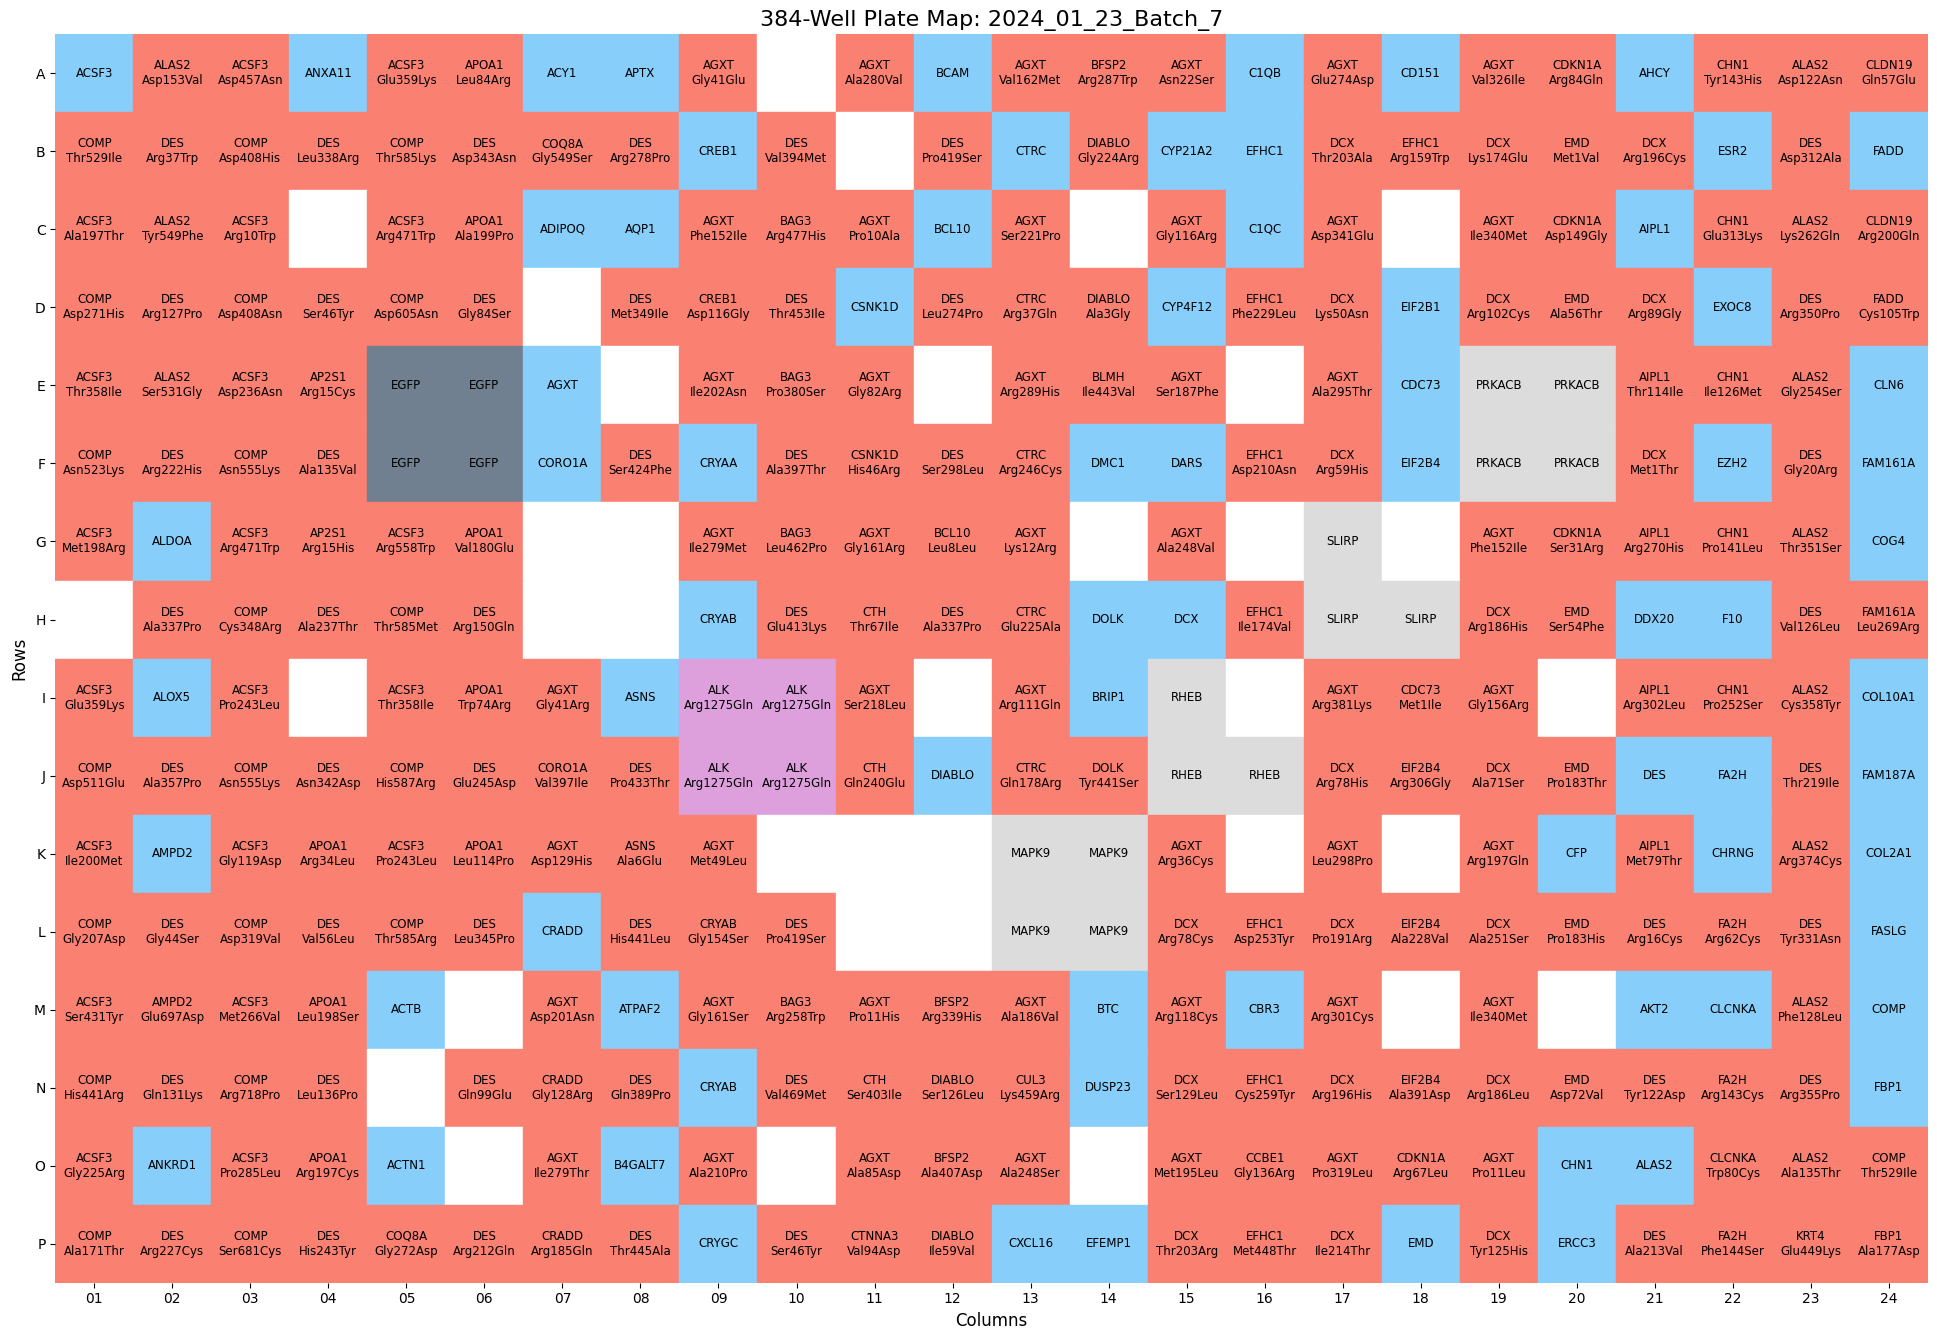

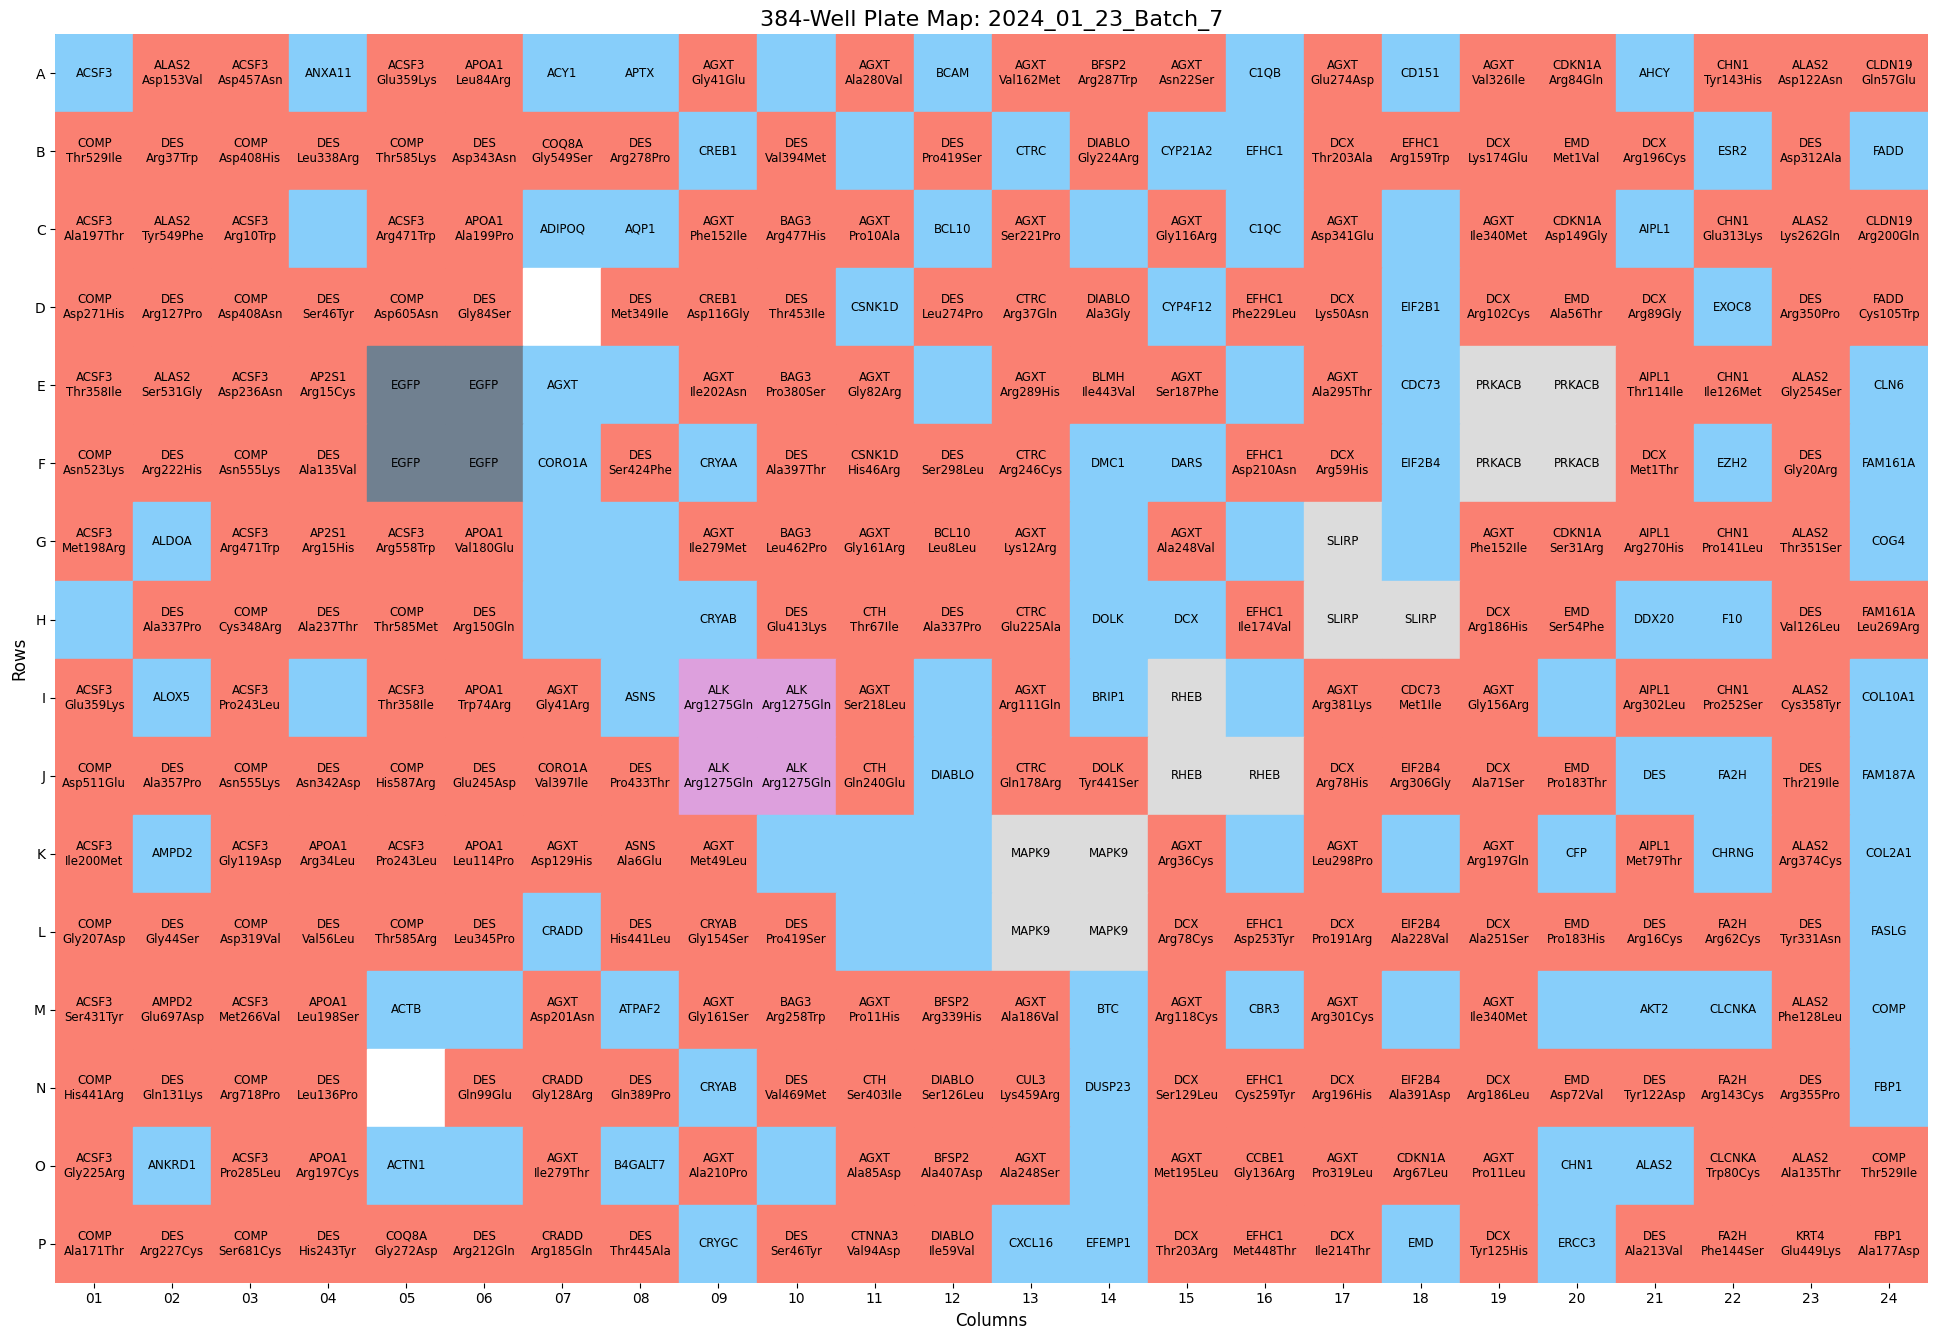

In [64]:
plate_map_id = "B7A1R1_P1.txt"
meta_dat_b134_corrected = pl.read_csv(Path(data_dir_out) / Path("2024_01_23_Batch_7") /Path(plate_map_id), separator='\t', has_header=True)
meta_dat_b134_corrected

# Plot first platemap
plate_map = meta_dat_b134_corrected.filter(
                ~pl.all_horizontal(pl.all().is_null())
            ).filter(~pl.col("gene_allele").is_null())
plate_grid = plot_platemap(plate_map, "2024_01_23_Batch_7")

plate_grid = plot_platemap(meta_dat_b134_corrected, "2024_01_23_Batch_7")

In [66]:
meta_dat_b134_corrected.filter(pl.col("well_position")=="G08")

plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
str,str,str,str,str,str,str,str,str,f64,f64,str,str,f64,i64,i64,i64,str,str,str,str,f64,str,i64,i64,i64,i64,i64,i64,str
"""B7A1R1_P1""","""G08""","""disease_wt""",null,null,"""G08""","""B7A1R1_P1""","""B8A1R2_P1""","""disease_wt""",null,null,null,null,1.0,1,7,8,null,null,null,null,null,null,1,2,4,4,7,8,"""G"""


## Function testing and implementation

In [101]:
batch_dir = "2024_01_23_Batch_7"

raw_meta_data = "B7A1R1_P1.txt"
batch_number = f"b{batch_dir.split('_')[-1]}"  # Extract batch number from batch_dir
plate_id = raw_meta_data.split('.')[0]

raw_meta_df = pd.read_csv(os.path.join(data_dir, batch_dir, "platemap", raw_meta_data), sep="\t", header=0)
print("Raw metadata shape: ", raw_meta_df.shape)
print("Raw metadata columns: ", raw_meta_df.columns)

# mut_info_df = raw_meta_df[ALLELE_INFO_COLS].copy()
well_info_df = raw_meta_df[WELL_INFO_COLS].copy()

print("Raw mut_info_df shape: ", mut_info_df.shape)
print("Raw well_info_df shape: ", well_info_df.shape)

# Find duplicates gene_alleles in a specific plate
duplicates = mut_info_df[mut_info_df.duplicated(subset=['gene_allele'], keep=False)]
# Sort by the column to group duplicates together
duplicates_sorted = duplicates.sort_values('gene_allele')
print("A subset of duplicated alleles on the same plate:")
display(duplicates_sorted.head(6))

# ## deduplicate gene alleles
# mut_info_df_dedup = mut_info_df.drop_duplicates(subset=['gene_allele'])
# print("After deduplication, mut_info_df has shape: ", mut_info_df_dedup.shape)

Raw metadata shape:  (384, 36)
Raw metadata columns:  Index(['plate_map_name', 'well_position', 'control_type', 'symbol',
       'gene_allele', 'source_plate', 'source_well', 'source_numb',
       'dest_plate', 'dest_well', 'dest_numb', 'imaging_well',
       'imaging_plate_R1', 'imaging_plate_R2', 'node_type', 'orf_id_wt',
       'ccsb_mutation_id', 'nt_change_cdna', 'aa_change', 'allele_set',
       'imaging_plate', 'batch1', 'batch2', 'clone_ID', 'hgmd_ID',
       'clinvar_allele_ID', 'clinvar_clinical_significance', 'vector', 'notes',
       'plate', 'quad', 'c96', 'r96', 'r384', 'c384', 'r384_letter'],
      dtype='object')
Raw mut_info_df shape:  (384, 19)
Raw well_info_df shape:  (384, 17)
A subset of duplicated alleles on the same plate:


,control_type,symbol,gene_allele,source_plate,source_well,source_numb,dest_plate,dest_well,dest_numb,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance
27,PC,ALK,ALK,527 Lenti Controls,B01,2.0,FVrry_P02_Q01,D04,28,PC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
315,PC,ALK,ALK,527 Lenti Controls,B01,2.0,FVrry_P02_Q04,D04,28,PC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
219,PC,ALK,ALK,527 Lenti Controls,B01,2.0,FVrry_P02_Q03,D04,28,PC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
123,PC,ALK,ALK,527 Lenti Controls,B01,2.0,FVrry_P02_Q02,D04,28,PC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
228,PC,ALK,ALK_Arg1275Gln,527 Lenti Controls,C01,3.0,FVrry_P02_Q03,E05,37,PC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
36,PC,ALK,ALK_Arg1275Gln,527 Lenti Controls,C01,3.0,FVrry_P02_Q01,E05,37,PC,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [102]:
well_info_df["plate_well_id"] = well_info_df["plate_map_name"] + "-" + well_info_df["imaging_well"]
meta_corrected_df = meta_corrected_df[meta_corrected_df[f'imaging_plate_R1_{batch_number}']==plate_id].copy()
# display(well_info_df.head())

## Merge the mapping with both dataframes
well_info_df = well_info_df.merge(
    meta_corrected_df,
    left_on='plate_well_id',
    right_on=f'plate_well_id_{batch_number}',
    how='left'
)
# display(well_info_df.head())
print("After merging well_info_df with meta_corrected_df, well_info_df has shape: ", well_info_df.shape)
# display(well_info_df[well_info_df["well_position"]=="N05"])

## Merge the mapping with both dataframes
well_info_df = well_info_df.merge(
    mut_info_df_dedup,
    left_on='final_gene_allele',
    right_on='gene_allele',
    how='left'
)
display(well_info_df[well_info_df["well_position"]=="P23"])

# display(well_info_df[well_info_df["well_position"]=="N05"])

## Previous code for finding duplicates alleles
# # Find duplicates in a specific column (e.g., 'imaging_well')
# duplicates = well_info_df[well_info_df.duplicated(subset=['plate_well_id'], keep=False)]
# # Sort by the column to group duplicates together
# duplicates_sorted = duplicates.sort_values(by=['plate_well_id', 'final_gene_allele'])
# display(duplicates_sorted)

well_info_df = well_info_df[[col for col in raw_meta_df.columns if col not in 
                     ["source_plate", "source_well", "source_numb",
                      "dest_plate", "dest_well", "dest_numb"]]].copy()
print("After merging well_info_df with mut_info_df_dedup, well_info_df has shape: ", well_info_df.shape)
# display(well_info_df.head())

well_info_df_final = well_info_df # .drop(columns=["source_plate","source_well","source_numb","dest_plate", "dest_well", "dest_numb"])
print("Final data frame dim:", well_info_df_final.shape)

display(well_info_df_final[well_info_df_final["well_position"]=="P23"])

# well_info_df_final.to_csv(os.path.join(data_dir, f"{plate_id}_corrected.txt"), sep="\t", index=False)

After merging well_info_df with meta_corrected_df, well_info_df has shape:  (384, 25)


,plate_map_name,well_position,imaging_well,imaging_plate_R1,imaging_plate_R2,imaging_plate,batch1,batch2,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter,plate_well_id,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8,control_type,symbol,gene_allele,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance
287,B7A1R1_P1,P23,P23,B7A1R1_P1,B8A1R2_P1,1,7,8,527.0,NaN,1,3,12,8,16,23,P,B7A1R1_P1-P23,P23,B7A1R1_P1,B8A1R2_P1,KRT4,KRT4_Glu449Lys,B7A1R1_P1-P23,B8A1R2_P1-P23,allele,KRT4,KRT4_Glu449Lys,allele,13592.0,218110.0,1345G>A,Glu449Lys,1.0,NaN,NaN,NaN,NaN


After merging well_info_df with mut_info_df_dedup, well_info_df has shape:  (384, 30)
Final data frame dim: (384, 30)


,plate_map_name,well_position,control_type,symbol,gene_allele,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
287,B7A1R1_P1,P23,allele,KRT4,KRT4_Glu449Lys,P23,B7A1R1_P1,B8A1R2_P1,allele,13592.0,218110.0,1345G>A,Glu449Lys,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,3,12,8,16,23,P


In [45]:
mut_info_df_dedup[mut_info_df_dedup["symbol"]=="TRIM32"]

,control_type,symbol,gene_allele,source_plate,source_well,source_numb,dest_plate,dest_well,dest_numb,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance


In [91]:
mut_info_df_dedup[mut_info_df_dedup["gene_allele"]=="KRT4_Glu449Lys"]

,control_type,symbol,gene_allele,source_plate,source_well,source_numb,dest_plate,dest_well,dest_numb,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance


### Sanity check

In [127]:
# # Merge meta_corr with right_meta to check for matches
# merged_right = meta_corrected_df.rename(columns={"imaging_well_":"well_position",
#                                                  "final_gene_allele":"gene_allele"}).merge(well_info_df, on=['well_position', 'gene_allele'], how='left', indicator=True)
# # Merge meta_corr with wrong_meta to check for matches
# merged_wrong = meta_corrected_df.rename(columns={"imaging_well_":"well_position",
#                                                  "final_gene_allele":"gene_allele"}).merge(raw_meta_df, on=['well_position', 'gene_allele'], how='left', indicator=True)
# Create a new column in meta_corr to indicate if both conditions are met
# meta_corrected_df['right_match'] = merged_right['_merge'] == 'both'
# meta_corrected_df['wrong_match'] = merged_wrong['_merge'] == 'both'

# # Check if both conditions are met for each row
# meta_corrected_df['both_match'] = meta_corrected_df['right_match'] & meta_corrected_df['wrong_match']

# # Drop the intermediate columns if not needed
# meta_corrected_df.drop(columns=['right_match', 'wrong_match'], inplace=True)
# merged_wrong

,plate_map_name,well_position,control_type,symbol,gene_allele,original_source
7,B7A1R1_P1,A08,disease_wt,APOD,APOD,raw_meta_data
8,B7A1R1_P1,A08,disease_wt,APTX,APTX,corrected_meta_data
10,B7A1R1_P1,A10,disease_wt,B4GALT7,B4GALT7,raw_meta_data
11,B7A1R1_P1,A10,NaN,NaN,NaN,corrected_meta_data
13,B7A1R1_P1,A12,disease_wt,BANF1,BANF1,raw_meta_data
14,B7A1R1_P1,A12,disease_wt,BCAM,BCAM,corrected_meta_data


Raw meta data:


,plate_map_name,well_position,control_type,symbol,gene_allele,source_plate,source_well,source_numb,dest_plate,dest_well,dest_numb,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
120,B7A1R1_P1,A08,disease_wt,APOD,APOD,FV_reLR_01,B01,2.0,FVrry_P01_Q02,A04,25,A08,B7A1R1_P1,B8A1R2_P1,disease_wt,4506.0,NaN,NaN,NaN,1,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,2,4,1,1,8,A


Corrected new meta data:


,plate_map_name,well_position,control_type,symbol,gene_allele,source_plate,source_well,source_numb,dest_plate,dest_well,dest_numb,imaging_well,imaging_plate_R1,imaging_plate_R2,node_type,orf_id_wt,ccsb_mutation_id,nt_change_cdna,aa_change,allele_set,imaging_plate,batch1,batch2,clone_ID,hgmd_ID,clinvar_allele_ID,clinvar_clinical_significance,vector,notes,plate,quad,c96,r96,r384,c384,r384_letter
120,B7A1R1_P1,A08,disease_wt,APTX,APTX,DisWTGDEh03,F09,70.0,FVrry_P01_Q02,B04,26.0,A08,B7A1R1_P1,B8A1R2_P1,disease_wt,55531.0,NaN,NaN,NaN,1.0,1,7,8,NaN,NaN,NaN,NaN,527.0,NaN,1,2,4,1,1,8,A


Reference meta data used for correction:


,symbol,gene_allele,imaging_well_,imaging_plate_R1_b7,imaging_plate_R2_b8,final_symbol,final_gene_allele,plate_well_id_b7,plate_well_id_b8
120,APOD,APOD,A08,B7A1R1_P1,B8A1R2_P1,APTX,APTX,B7A1R1_P1-A08,B8A1R2_P1-A08


In [130]:
well_info_df_final = well_info_df.drop(columns=["source_plate","source_well","source_numb",
                                                "dest_plate", "dest_well", "dest_numb"])
print("Final data frame dim:", well_info_df_final.shape)

Final data frame dim: (384, 30)


In [132]:
well_info_df_final.to_csv(os.path.join(data_dir, f"{plate_id}_corrected.txt"), sep="\t", index=False)